## Importing the Libraries and Loading the Data.

In [108]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [82]:
housing = pd.read_csv(r"C:\Users\DELL\Downloads\archive (9)\housing.csv", encoding="unicode_escape")

## Understanding the Data.

In [83]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [84]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 1. There are 10 columns and 20640 rows in datasets.
#### 2. All colums are of numerical data type except ocean_proximity.
#### 3. Total bedrooms has 20433 non-null values meaning 207 entries are missing.

In [85]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


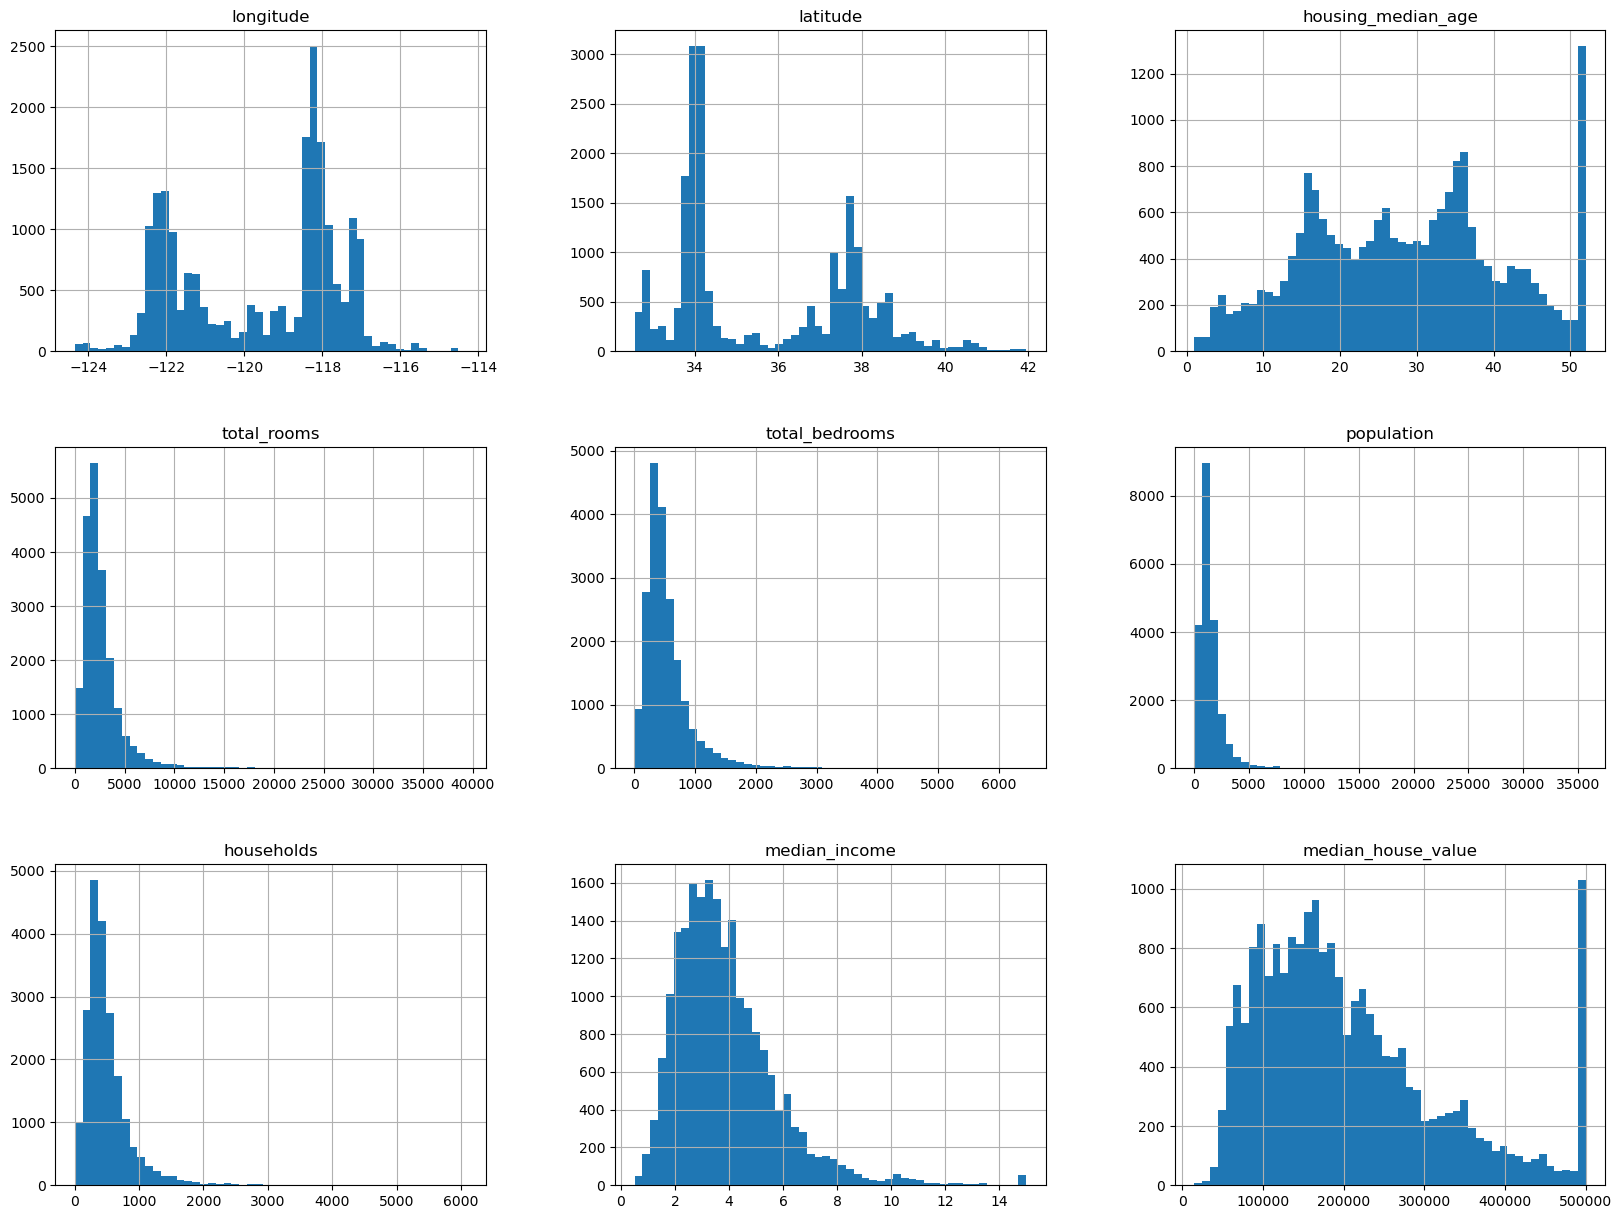

In [86]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Insights about the data from Histogram:
### 1. Median Income attribute does not look like it is expressed in US Dollars.
### 2. The housing_median age and median_house_value are also capped.
### 3. Most histograms are tail heavy as well.

## Creating a Test Set.

In [87]:
from sklearn.model_selection import train_test_split
train_test, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [88]:
## Since median_income attribute is continuous attribute.
## Now creating Income category attribute.

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])


<Axes: >

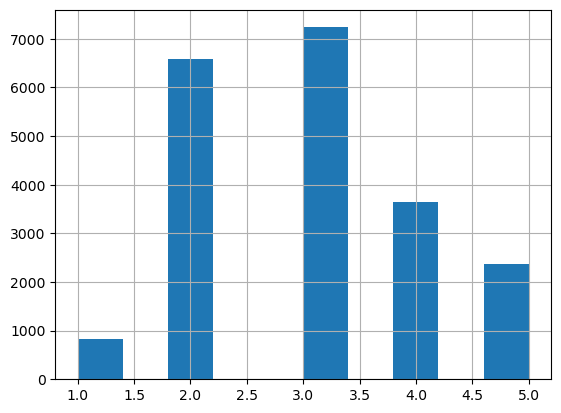

In [89]:
## Plotting the histogram from new created housing[income_category] attribute.

housing["income_cat"].hist()

In [90]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [91]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

### Here it is clear that test set generated using Stratified sampling has income category proportions almost identical to those of full dataset.

In [92]:
# Now removing income_cat attribute to make dataset back to it's original form.

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Creating a copy of dataset and Visualizing Geographical Data.

In [93]:
housing = strat_train_set.copy()

Text(0.5, 1.0, 'Geographical Scatterplot of Data')

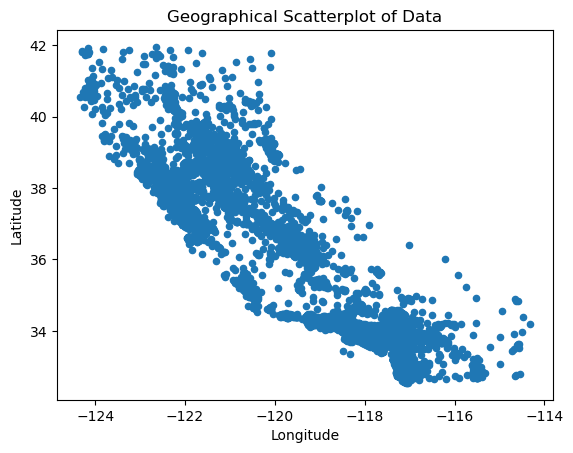

In [94]:
housing.plot(kind='scatter', x="longitude", y="latitude")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Scatterplot of Data")


Text(0.5, 1.0, 'Geographical Scatterplot of Data with High Density')

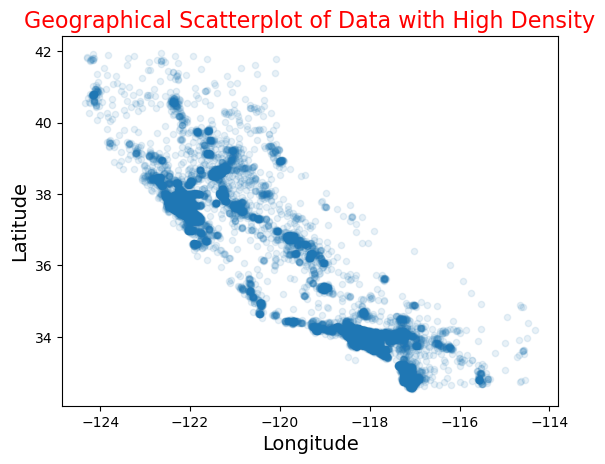

In [95]:
# Using alpha=0.1 to plot places with higher density.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Geographical Scatterplot of Data with High Density", fontsize=16, color="Red")

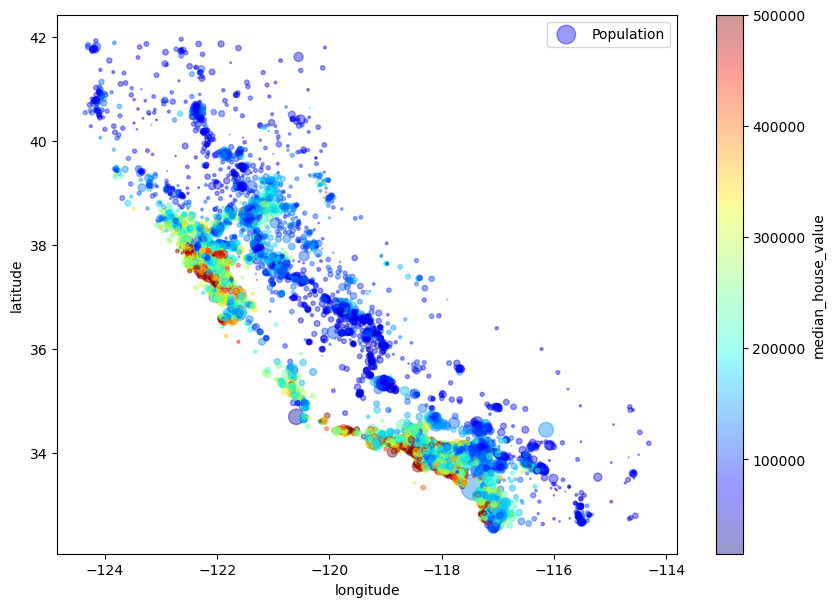

In [96]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,            
)

plt.legend()

### In the above graph: Red shows expensive,blue shows cheap and larger circles represent areas with larger population.

In [97]:
## Looking for few Correlations 
##+1 shows higher positive correlation and -1 shows negative correlation.

corr_matrix = housing.corr()

In [98]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

### Here it is clear from the correlation that median_house_value is quite correlated with median_income.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

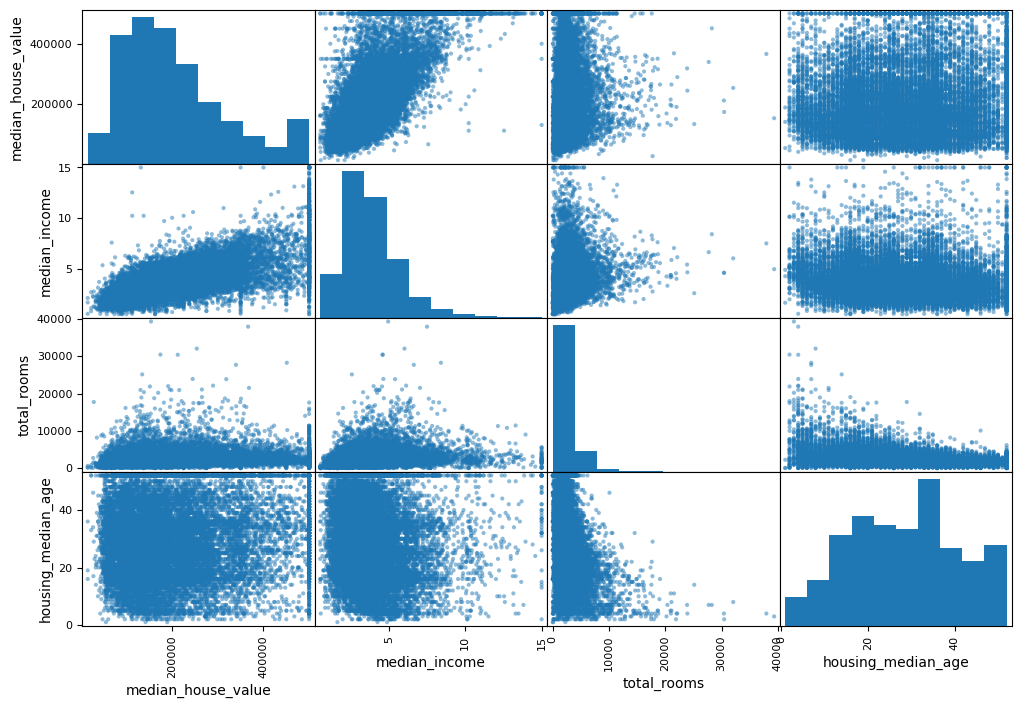

In [99]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

Text(0.5, 1.0, 'Median Income VS Median House Value')

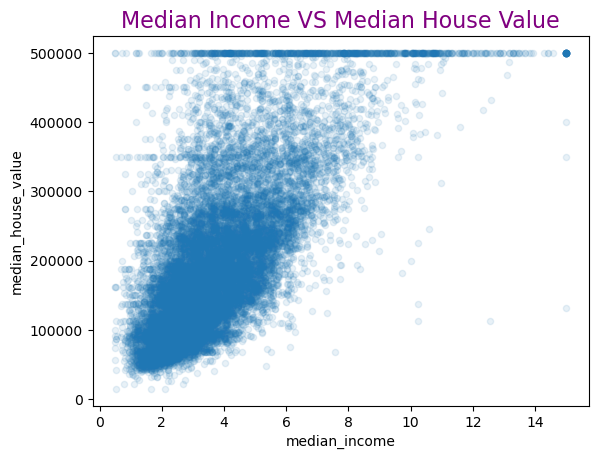

In [100]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.title("Median Income VS Median House Value", fontsize=16, color="Purple")

### Here we can see clearly that correlation is quite strong. And there is price cap at 50,000 USD and 4,50,000 USD.

In [21]:
## Trying some combination of attributes.

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

### Here we can see that clearly new created attribute bedrooms_per_rooms is more correlated to median_house_value.

## Preparing Data for Machine Learning Algorithms.

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [24]:
housing.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [26]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [28]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [30]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(15)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [32]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transfomers

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

In [37]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

## Class created that adds all combined attributes we discussed above.

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__ (self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #Nothing else to do here
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        


In [38]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
hosuing_extra_attribs = attr_adder.transform(housing.values)

## Transformation Pipelines

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])



In [40]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
from sklearn.compose import ColumnTransformer

In [42]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [43]:
housing_prepared = full_pipeline.fit_transform(housing)

## Training a Model

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [45]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [46]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### Linear regression is working but the first prediction is off by close to 40% which means it is not perfectly accurate.

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Quite strange!!! Here is means that there is no error at all. So trying the Cross validation feature.

## Trying to evaluate using Cross-Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [101]:
display_scores(tree_rmse_scores)

Scores: [71211.21258013 71277.51998353 68964.98509677 72611.34681337
 69970.54598494 75558.42849149 71587.04155529 73999.20497907
 67308.05286542 71273.24730232]
Mean: 71376.15856523273
Standard Deviation: 2243.399909748335


### Now it is clear that Decision Tree is not as good as it looked earlier.

In [55]:
## Computing same scores for Linear Regression model as well

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70135.96556127]
Mean: 69103.69661464215
Standard Deviation: 2880.190583299432


In [56]:
## Trying last model: Random Forest Regressor.

from sklearn.ensemble import RandomForestRegressor

In [58]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [59]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18774.350659246047

In [62]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51388.85525074 48747.04860479 46805.84259505 51762.90402641
 47485.73954283 51713.85917834 52568.81158408 49713.21621308
 48428.83650931 53735.17739521]
Mean: 50235.02908998421
Standard Deviation: 2204.922974201301


### Random Forest model looks much better than the other two.

### Trying Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
    
]

In [65]:
forest_reg = RandomForestRegressor()

In [66]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [70]:
cvres = grid_search.cv_results_

In [71]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64020.398229876904 {'max_features': 2, 'n_estimators': 3}
55038.03402890849 {'max_features': 2, 'n_estimators': 10}
52768.151098069946 {'max_features': 2, 'n_estimators': 30}
60823.176510529054 {'max_features': 4, 'n_estimators': 3}
53057.43461184016 {'max_features': 4, 'n_estimators': 10}
50325.272303395446 {'max_features': 4, 'n_estimators': 30}
58960.216369501635 {'max_features': 6, 'n_estimators': 3}
52429.96723803935 {'max_features': 6, 'n_estimators': 10}
49934.71960623495 {'max_features': 6, 'n_estimators': 30}
57866.94619812043 {'max_features': 8, 'n_estimators': 3}
52275.03165896058 {'max_features': 8, 'n_estimators': 10}
50099.0886894552 {'max_features': 8, 'n_estimators': 30}
62479.12373887205 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54275.370998529506 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59342.62747854513 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52434.84842282302 {'bootstrap': False, 'max_features': 3, 'n_estimators

## Analyzing the Best model and their errors.

In [72]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.28495425e-02, 7.08192577e-02, 4.26172475e-02, 1.83024090e-02,
       1.63293411e-02, 1.75915853e-02, 1.56819224e-02, 3.39395382e-01,
       6.65483890e-02, 1.09111117e-01, 6.30653234e-02, 1.84515006e-02,
       1.42205618e-01, 6.18807057e-05, 2.63629413e-03, 4.33318998e-03])

In [73]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3393953824464404, 'median_income'),
 (0.14220561756130365, 'INLAND'),
 (0.10911111665310938, 'pop_per_hhold'),
 (0.07284954250225328, 'longitude'),
 (0.07081925767048676, 'latitude'),
 (0.06654838897809302, 'rooms_per_hhold'),
 (0.06306532344112756, 'bedrooms_per_room'),
 (0.04261724747048956, 'housing_median_age'),
 (0.018451500572260863, '<1H OCEAN'),
 (0.018302409006792912, 'total_rooms'),
 (0.017591585307968362, 'population'),
 (0.016329341149856784, 'total_bedrooms'),
 (0.015681922424448803, 'households'),
 (0.004333189983655805, 'NEAR OCEAN'),
 (0.002636294125974966, 'NEAR BAY'),
 (6.18807057379351e-05, 'ISLAND')]

## Evaluating system on Test set

In [74]:
final_model = grid_search.best_estimator_

In [75]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [78]:
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [79]:
from scipy import stats

In [80]:
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45649.73404458, 49513.5223247 ])

### ------------------------------------------- Project Ends--------------------------------------------------